In [1]:
import torch, torchvision
import matplotlib.pyplot as plt
from einops import rearrange, reduce, repeat

import numpy as np

from PIL import Image

import kornia

from apply_flow import apply_flow

device='cuda'

H, W = 480, 640
BATCH_SIZE = 4

img = Image.open("./img.jpeg").resize([W, H]) 
img_tensor = torchvision.transforms.ToTensor()(img)
img_batch = repeat(img_tensor, 'h w c -> b h w c', b=BATCH_SIZE)

flow_batch = torch.randn((BATCH_SIZE, H, W, 2), device=device) * 5
flow_batch.requires_grad = True




img_batch = img_batch.to(device); 



In [2]:
flow_batch.shape

torch.Size([4, 480, 640, 2])

In [3]:
flowed_img_batch = apply_flow(img_batch, flow_batch)

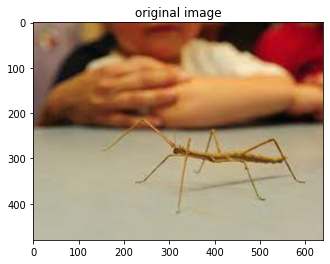

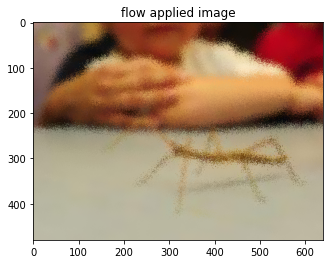

In [4]:
plt.imshow(kornia.tensor_to_image(img_batch[0])); plt.title('original image'); plt.show()

plt.imshow(kornia.tensor_to_image(flowed_img_batch[0])); plt.title('flow applied image'); plt.show()

In [5]:
flowed_img_batch.mean().backward()

In [6]:
flow_batch.grad.min()

tensor(-1.8580e-07, device='cuda:0')